In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])
%matplotlib inline

In [10]:
from io import StringIO

def extractfeatures(filename):
    #TODO
    # get the file 
    array = np.genfromtxt(filename, delimiter=",")
    return array[1:, 0], array[1:, 1]

In [11]:
extractfeatures("training.csv")

(array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
         67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
         78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
        100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
        111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
        122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
        133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
        144., 145., 146., 147., 148., 

In [12]:
def normalizeFeatures(X):
    # given the array - to Z-score normalization
    return (X - np.mean(X)) / np.std(X)

In [33]:
def computeCost(X,y,theta):
    m = len(y)
    # vectorized solution
    y = y.reshape(m, 1)
    # this is J = the cost function
    return (np.dot((np.dot(X, theta) - y).T, (np.dot(X, theta) - y))) / (2 * m)

In [34]:
def gradientDescent(X,y,theta,alpha,iterations):
    J_history = np.zeros((iterations, 1))

    m = len(y)

    for iter in range(iterations):
        s1 = 0
        s0 = 0
        for i in range(m):
            s0 += ((theta[0] + theta[1] * X[i, 1]) - y[i])
            s1 += ((theta[0] + theta[1] * X[i, 1]) - y[i]) * X[i, 1]
        # weight updates
        theta[0] -= alpha * s0 / m
        theta[1] -= alpha * s1 / m

        J_history[iter] = computeCost(X, y, theta)
    
    return theta, J_history

In [14]:
def predict(theta,X):
    return theta[0] + theta[1] * X

In [37]:
def sumSquaresError(y, y_pred):
    return round(((y - y_pred) ** 2).sum() / len(y), 3)

In [16]:
#Load the data
X,y=extractfeatures('training.csv')#loading data from training dataset
m=len(y) # number of training examples
print("Loaded",str(m), "training examples")

Loaded 799 training examples


In [17]:
#Normalize the data
norm_X=normalizeFeatures(X)
print("Data Normalization ended")

Data Normalization ended


Text(0, 0.5, '$y$')

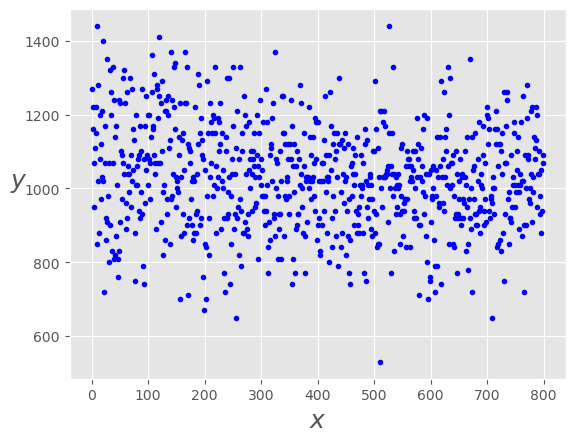

In [18]:
"""
Let's plot our data to check the relation between X and Y
"""
plt.figure(1)
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

In [38]:
##Analytical Solution
A = np.c_[np.ones((norm_X.size,1)),norm_X]
theta = np.linalg.lstsq(A, y, rcond=None)
print(f'Theta (analytical): [ {theta[0].tolist()} , {theta[1][0]}] ')

Theta (analytical): [ [1030.5757196495617, -20.165570224917854] , 15681421.641186796] 


Text(0, 0.5, '$y$')

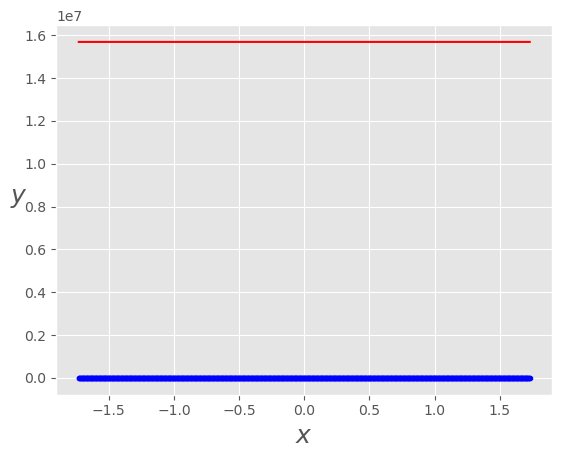

In [40]:
""" Let's plot the prediction line with the calculated theta"""

X_ln = np.array([min(norm_X),max(norm_X)]) #Plot a line between min x and max x
A_ln = np.c_[np.ones((2,1)),X_ln]
y_ln = A_ln.dot(theta[0]) + theta[1]

plt.figure(1)
plt.plot(X_ln,y_ln,'r-')
plt.plot(norm_X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([0,2,0,15])

In [41]:
##Train the linear model 
input_X=np.c_[np.ones((m,1)),norm_X]#Add a column of ones to X
theta=np.ones((2,1))#initialize fitting parameters

iterations=100
alpha = 0.05

theta1,J_history=gradientDescent(input_X,y,theta,alpha,iterations)#gets the final data and the values of cost function in each iteration

#Training set error
print("The SSE in the training set for alpha =  ",alpha, "is ", sumSquaresError(y, predict(theta1, norm_X)))

The SSE in the training set for alpha =   0.05 is  19663.482


In [42]:
theta1

array([[1024.48008652],
       [ -20.04025885]])

Text(0, 0.5, '$y$')

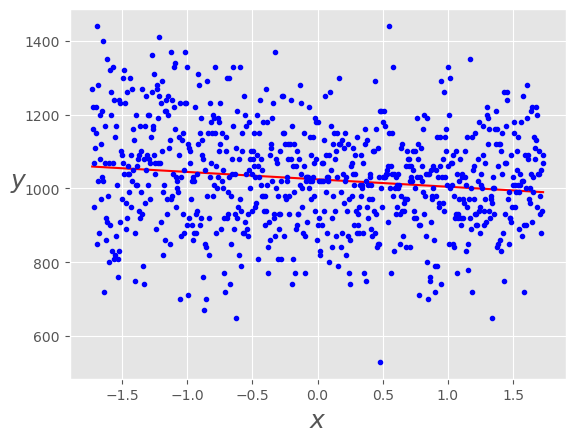

In [43]:
""" Let's plot the prediction line with the calculated theta"""

X_ln = np.array([min(norm_X),max(norm_X)]) #Plot a line between min x and max x
A_ln = np.c_[np.ones((2,1)),X_ln]
y_ln = A_ln.dot(theta1)

plt.figure(1)
plt.plot(X_ln,y_ln,'r-')
plt.plot(norm_X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([0,2,0,15])

In [44]:
#Prediction of GPA for test dataset
test=np.genfromtxt('testfile.csv',delimiter=',')
IDs=test[1:,0]
Xtest=normalizeFeatures(test[1:,1])
Ytest=predict(theta1,Xtest)

In [45]:
# Preparing the output file
output=open("output.csv",'w')
output.write("ID,GPA\n")
for i in range(0,len(Ytest)):
    output.write(str(int(IDs[i]))+","+str(Ytest[i])+"\n")
output.close()